# SOLEMNE 1 MINERÍA DE DATOS

En este trabajo se realizará un análisis de datos sobre el COVID-19 y su impacto, para ello se utilizará un conjunto de datos públicos relacionados con el COVID-19 disponibles en BigQuery en la página de Google Cloud Platform

## Desarrollo de la Actividad

El primer paso a realizar es utlizar un paquete de python para así utilizar Bigquery, el cual corresponde al escrito en la siguiente línea de código. Además, se definirá un "cliente" el cuál nos permitirá recopilar la información adquirida por la base de datos.

In [2]:
from google.cloud import bigquery

client = bigquery.Client(project='pegasus-418020')

El nombre de pegasus corresponde al de un proyecto creado en Google Cloud Platform, en el cual mediante él se accederá a la base de datos que se utilizará.

El conjunto de datos públicos utilizado corresponde a la "respuesta del gobierno frente a la pandemia debido al COVID-19", perteneciente a la Universidad de Oxford. Este set de datos es bastante interesante debido a que Inglaterra fue uno de los países que a pesar de presentar un rápido aumento de casos de COVID-19 a inicios del año 2020, se convirtió en uno de los primeros países que mantuvo un control de esta epidemia, conviertiéndose en el primer país del mundo en aprobar la vacuna Pfizer/BioNTech, empezar una vacuanción masiva y desarrollar la vacuna Oxford-AstraZeneca (todos estos eventos mencionados se dieron a lugar en diciembre del año 2020). Debido a estos eventos y al involucramiento de la Universidad de Oxford en el desarrollo de una vacuna que hizo frente a la pandemia, es que se utilizarán estos datos.  

A continuación se presenta el código que permitirá acceder a los datos proporcionados por la Universidad de Oxford.

In [3]:
dataset_ref = client.dataset("covid19_govt_response", project="bigquery-public-data")

dataset = client.get_dataset(dataset_ref)

Debido a que el conjunto de estos datos corresponde a una colección de tablas, se utilizará el siguiente comando que permitirá hacer una lista de las tablas perteneciente en el dato de "covid19_govt_response".

In [4]:
tables = list(client.list_tables(dataset))

for table in tables:  
    print(table.table_id)

oxford_policy_tracker


La siguiente celda de código permite recuperar la tabla "completa" en el conjunto de datos "covid19_govt_response".

In [5]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("oxford_policy_tracker")

# API request - fetch the table
table = client.get_table(table_ref)

Al recuperar la tabla "completa" mediante la línea de código anterior, se utilizará la "table" obtenida junto con un "schema". La implementación de esto es debido a que la tabla posee una estructura de datos que necesitamos visualizar para así extraer los datos necesarios para los análisis correspondientes. Por lo tanto, lo que se obtiene son las siguientes estructuras dentro de la tabla:

In [6]:
table.schema

[SchemaField('country_name', 'STRING', 'NULLABLE', None, 'Name of the country', (), None),
 SchemaField('alpha_3_code', 'STRING', 'NULLABLE', None, '3-letter alpha code abbreviation of the country/region. See `bigquery-public-data.utility_us.country_code_iso` for more details', (), None),
 SchemaField('region_name', 'STRING', 'NULLABLE', None, 'Name of the region within the country', (), None),
 SchemaField('region_code', 'STRING', 'NULLABLE', None, 'Code of the region within the country', (), None),
 SchemaField('date', 'DATE', 'NULLABLE', None, 'Date of the measured policy action status', (), None),
 SchemaField('school_closing', 'STRING', 'NULLABLE', None, 'C1 - Ordinal scale record closings of schools and universities; 0 - No measures 1 - recommend closing 2 - Require closing (only some levels or categories eg just high school or just public schools) 3 - Require closing all levels No data - blank', (), None),
 SchemaField('school_closing_flag', 'STRING', 'NULLABLE', None, 'Are C1 a

Ahora bien, también es posible observar los primeros elementos dentro de todo este conjunto de datos, como lo puede ser mediante la siguiente línea de código que entregará las primeras 3 líneas de la tabla.

In [159]:
client.list_rows(table, max_results=3).to_dataframe()

,country_name,alpha_3_code,region_name,region_code,date,school_closing,school_closing_flag,school_closing_notes,workplace_closing,workplace_closing_flag,...,contact_tracing_notes,emergency_healthcare_investment,emergency_healthcare_investment_notes,vaccine_investment,vaccine_investment_notes,misc_wildcard,misc_wildcard_notes,confirmed_cases,deaths,stringency_index
0,Aruba,ABW,None,None,2021-09-07,2.0,1.0,None,None,None,...,None,NaN,None,NaN,None,None,None,14913,151,37.96
1,Aruba,ABW,None,None,2021-09-08,None,None,None,None,None,...,None,NaN,None,NaN,None,None,None,14955,153,37.96
2,Aruba,ABW,None,None,2021-09-09,None,None,None,None,None,...,None,NaN,None,NaN,None,None,None,14991,154,37.96


También es posible seleccionar una mayor cantidad de datos para visualizar, como lo es en el siguiente caso en el que se seleccionarán los primeros 10 datos de la tabla seleccionada.

In [160]:
client.list_rows(table, selected_fields=table.schema[:10], max_results=10).to_dataframe()

,country_name,alpha_3_code,region_name,region_code,date,school_closing,school_closing_flag,school_closing_notes,workplace_closing,workplace_closing_flag
0,Aruba,ABW,None,None,2021-09-07,2.0,1.0,None,None,None
1,Aruba,ABW,None,None,2021-09-08,None,None,None,None,None
2,Aruba,ABW,None,None,2021-09-09,None,None,None,None,None
3,Afghanistan,AFG,None,None,2021-08-25,None,None,None,None,None
4,Afghanistan,AFG,None,None,2021-08-26,None,None,None,None,None
5,Afghanistan,AFG,None,None,2021-08-27,None,None,None,None,None
6,Afghanistan,AFG,None,None,2021-08-28,None,None,None,None,None
7,Afghanistan,AFG,None,None,2021-08-29,None,None,None,None,None
8,Afghanistan,AFG,None,None,2021-08-30,None,None,None,None,None
9,Afghanistan,AFG,None,None,2021-08-31,None,None,None,None,None


Nos encontramos trabajando con una extensa cantidad de datos, es debido a ello que para poder manejar los datos dentro de este gran espacio se realizarán consultas o un "query".
Un query es una consulta o solicitud que se realiza dentro de una base de datos para así obtener alguna información específica. Esta consulta de datos la escribimos en un lenguaje de consultas estructurados o SQL (Structured Query Language), permitiéndonos enviar esta consulta a la base de datos y obtener los resultados buscados. 

El código presentado a continuación corresponde a la ejecución de un query en donde pedimos obtener un resultado similar al código anterior pero con una ligera diferencia. En este código seleccionamos todas las columnas de datos mediante el "*", seleccionamos desde donde tomamos los datos, ordenamos las fechas de orden descendente y establecemos un límite de 10 datos, obteniendo lo siguiente: 

In [9]:
query = """
    SELECT *
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    ORDER BY date DESC 
    LIMIT 10
"""

query_job = client.query(query)

# Imprime los resultados
for row in query_job:
    print(row)

Row(('Argentina', 'ARG', None, None, datetime.date(2021, 9, 10), None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 75.93), {'country_name': 0, 'alpha_3_code': 1, 'region_name': 2, 'region_code': 3, 'date': 4, 'school_closing': 5, 'school_closing_flag': 6, 'school_closing_notes': 7, 'workplace_closing': 8, 'workplace_closing_flag': 9, 'workplace_closing_notes': 10, 'cancel_public_events': 11, 'cancel_public_events_flag': 12, 'cancel_public_events_notes': 13, 'restrictions_on_gatherings': 14, 'restrictions_on_gatherings_flag': 15, 'restrictions_on_gatherings_notes': 16, 'close_public_transit': 17, 'close_public_transit_flag': 18, 'close_public_transit_notes': 19, 'stay_at_home_requirements': 20, 'stay_at_home_requirements_flag': 21, 'stay_at_home_requirements_

A continuación realizaremos una variación con respecto al query obtenido anteriormente, en donde se consultará la misma cantidad de datos pero específicamente del año 2020, resultando en:

In [10]:
query = """
    SELECT *
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE EXTRACT(YEAR FROM date) = 2020
    ORDER BY date DESC
    LIMIT 10
"""

# Ejecuta la consulta y obtén los resultados
query_job = client.query(query)

# Imprime los resultados
for row in query_job:
    print(row)

Row(('Brazil', 'BRA', 'Santa Catarina', 'BR_SC', datetime.date(2020, 12, 31), None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 492583, 5253, None), {'country_name': 0, 'alpha_3_code': 1, 'region_name': 2, 'region_code': 3, 'date': 4, 'school_closing': 5, 'school_closing_flag': 6, 'school_closing_notes': 7, 'workplace_closing': 8, 'workplace_closing_flag': 9, 'workplace_closing_notes': 10, 'cancel_public_events': 11, 'cancel_public_events_flag': 12, 'cancel_public_events_notes': 13, 'restrictions_on_gatherings': 14, 'restrictions_on_gatherings_flag': 15, 'restrictions_on_gatherings_notes': 16, 'close_public_transit': 17, 'close_public_transit_flag': 18, 'close_public_transit_notes': 19, 'stay_at_home_requirements': 20, 'stay_at_home_requirements_flag': 21, 'stay_at_home

En el siguiente código de consulta de query se puede observar una variación mayor en lo pedido con respecto a los dos query anteriores. En este se seleccionará solamente los países, las fechas y la cantidad de eventos públicos cancelados debido a la pandemia, ordenando esta lista en orden descendente en función de esta última variable. El resultado de esta consulta de datos corresponde al siguiente:

In [166]:
query = """
    SELECT country_name, date, cancel_public_events
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    ORDER BY cancel_public_events DESC
    LIMIT 10
"""

# Ejecuta la consulta y obtén los resultados
query_job = client.query(query)

# Imprime los resultados
for row in query_job:
    print(row)

Row(('Brazil', datetime.date(2020, 5, 19), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Guinea', datetime.date(2021, 3, 11), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Guinea', datetime.date(2021, 3, 14), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Guinea', datetime.date(2021, 3, 13), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Guinea', datetime.date(2021, 3, 9), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Guinea', datetime.date(2021, 3, 16), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Guinea', datetime.date(2021, 3, 15), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Guinea', datetime.date(2021, 3, 12), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Guinea', datetime.date(2021, 3, 10), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Argen

También es posible realizar una carga de datos en DataFrames de pandas, lo que nos perimitirá realizar operaciones y manipulaciones a este conjunto de datos. Para poder utilizarlo es necesario en un primer paso cargar la librería de pandas mediante un "import pandas".

Para el siguiente caso podemos ver como se obtiene la cantidad de casos confirmados y la cantidad de muertes para Chile debido al COVID-19, en el cual al aplicar pandas obtenemos lo siguiente:

In [179]:
import pandas as pd

query = """
    SELECT  confirmed_cases, deaths 
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Chile'
    LIMIT 20
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Visualiza las primeras filas del DataFrame
print(df)


    confirmed_cases  deaths
0           1641526   37108
1           1641791   37115
2           1642146   37122
3           1642646   37159
4                 2    <NA>
5                 2    <NA>
6                 2    <NA>
7                 2    <NA>
8                 2    <NA>
9                 2    <NA>
10                2    <NA>
11                9    <NA>
12                9    <NA>
13               10    <NA>
14               10    <NA>
15               13    <NA>
16               13    <NA>
17               13    <NA>
18               20    <NA>
19               20    <NA>


Como se dijo anteriormente, pandas nos permitirá modificar y realizar operaciones a este conjunto de datos, de modo al ponerlo a prueba y elevando al cuadrado la cantidad de datos obtenidos, podemos observar que se obtiene lo siguiente:

In [180]:
import pandas as pd

query = """
    SELECT  confirmed_cases, deaths 
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Chile'
    LIMIT 20
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()
df0 = df **2

# Visualiza las primeras filas del DataFrame
print(df0)


    confirmed_cases      deaths
0     2694607608676  1377003664
1     2695477687681  1377523225
2     2696643485316  1378042884
3     2698285881316  1380791281
4                 4        <NA>
5                 4        <NA>
6                 4        <NA>
7                 4        <NA>
8                 4        <NA>
9                 4        <NA>
10                4        <NA>
11               81        <NA>
12               81        <NA>
13              100        <NA>
14              100        <NA>
15              169        <NA>
16              169        <NA>
17              169        <NA>
18              400        <NA>
19              400        <NA>


También es posible multiplicar estos datos que se han obtenido, pudiendo obtener lo siguiente:

In [181]:
df00 = df0 * df

print(df00)

        confirmed_cases          deaths
0   4423268449439479576  51097851963712
1   4425411008335476671  51126774495875
2   4428282312837728136  51155707939848
3   4432328509800202136  51308823210679
4                     8            <NA>
5                     8            <NA>
6                     8            <NA>
7                     8            <NA>
8                     8            <NA>
9                     8            <NA>
10                    8            <NA>
11                  729            <NA>
12                  729            <NA>
13                 1000            <NA>
14                 1000            <NA>
15                 2197            <NA>
16                 2197            <NA>
17                 2197            <NA>
18                 8000            <NA>
19                 8000            <NA>


El resultado que obtenemos al imprimir estos datos corresponde a una tabla con filas y columnas, asemejámdose a la forma de una matriz, por lo tanto, debido a las propiedades de la matriz, podemos trasponerla mediante el siguiente código:

In [168]:
query = """
    SELECT country_name, date, confirmed_cases, deaths, stringency_index
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Chile'
    LIMIT 20
"""

# Trasponer el DataFrame
df_transposed = df.transpose()

# Visualizar el DataFrame trasponido
print(df_transposed)

                          0           1           2           3           4   \
country_name           Chile       Chile       Chile       Chile       Chile   
date              2021-09-06  2021-09-07  2021-09-08  2021-09-09  2020-02-23   
confirmed_cases      1641526     1641791     1642146     1642646           2   
deaths                 37108       37115       37122       37159        <NA>   
stringency_index       63.43       63.43       63.43       63.43         0.0   

                          5           6           7           8           9   \
country_name           Chile       Chile       Chile       Chile       Chile   
date              2020-02-24  2020-02-25  2020-02-26  2020-02-27  2020-02-28   
confirmed_cases            2           2           2           2           2   
deaths                  <NA>        <NA>        <NA>        <NA>        <NA>   
stringency_index         0.0         0.0         0.0         0.0         0.0   

                          10          

Además, es posible realizar una combinación de dos matrices de diferentes datos. Tomando como ejemplo a dos países diferentes como Chile y Alemania, definimos un query para cada uno de ellos, y mediante la función "concat" de pandas podemos combinarlas, obteniendo lo siguiente:

In [172]:
query1 = """
    SELECT country_name, date, confirmed_cases, deaths, stringency_index
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Chile'
    LIMIT 10
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df1 = client.query(query1).to_dataframe()

query2 = """
    SELECT country_name, date, confirmed_cases, deaths, stringency_index
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Germany'
    LIMIT 10
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df2 = client.query(query2).to_dataframe()

combined_df = pd.concat([df1, df2])

# Visualiza el DataFrame combinado
print(combined_df)

  country_name        date  confirmed_cases  deaths  stringency_index
0        Chile  2021-09-06          1641526   37108             63.43
1        Chile  2021-09-07          1641791   37115             63.43
2        Chile  2021-09-08          1642146   37122             63.43
3        Chile  2021-09-09          1642646   37159             63.43
4        Chile  2020-02-23                2    <NA>              0.00
5        Chile  2020-02-24                2    <NA>              0.00
6        Chile  2020-02-25                2    <NA>              0.00
7        Chile  2020-02-26                2    <NA>              0.00
8        Chile  2020-02-27                2    <NA>              0.00
9        Chile  2020-02-28                2    <NA>              0.00
0      Germany  2020-01-28                4    <NA>              5.56
1      Germany  2020-01-29                4    <NA>              5.56
2      Germany  2020-01-30                4    <NA>              5.56
3      Germany  2020

Y de manera similar al caso anterior, esta matriz es posible trasponerla utilizando la propiedad "T", obteniendo lo siguiente:

In [173]:
transposed_df = combined_df.T

# Visualizar el DataFrame trasnpuesto
print(transposed_df)

                           0           1           2           3           4  \
country_name           Chile       Chile       Chile       Chile       Chile   
date              2021-09-06  2021-09-07  2021-09-08  2021-09-09  2020-02-23   
confirmed_cases      1641526     1641791     1642146     1642646           2   
deaths                 37108       37115       37122       37159        <NA>   
stringency_index       63.43       63.43       63.43       63.43         0.0   

                           5           6           7           8           9  \
country_name           Chile       Chile       Chile       Chile       Chile   
date              2020-02-24  2020-02-25  2020-02-26  2020-02-27  2020-02-28   
confirmed_cases            2           2           2           2           2   
deaths                  <NA>        <NA>        <NA>        <NA>        <NA>   
stringency_index         0.0         0.0         0.0         0.0         0.0   

                           0          

El acceso a esta gran cantidad de datos nos permite realizar análisis y gráficos de una gran cantidad de datos. A continuación se realizarán 5  gráficos diferentes mediante la utilización de la librería "matplotlib". Estos gráficos corresponderán a un gráfico lineal, pastel, de burbujas, pirámide y de barras.

# Gráfico Lineal

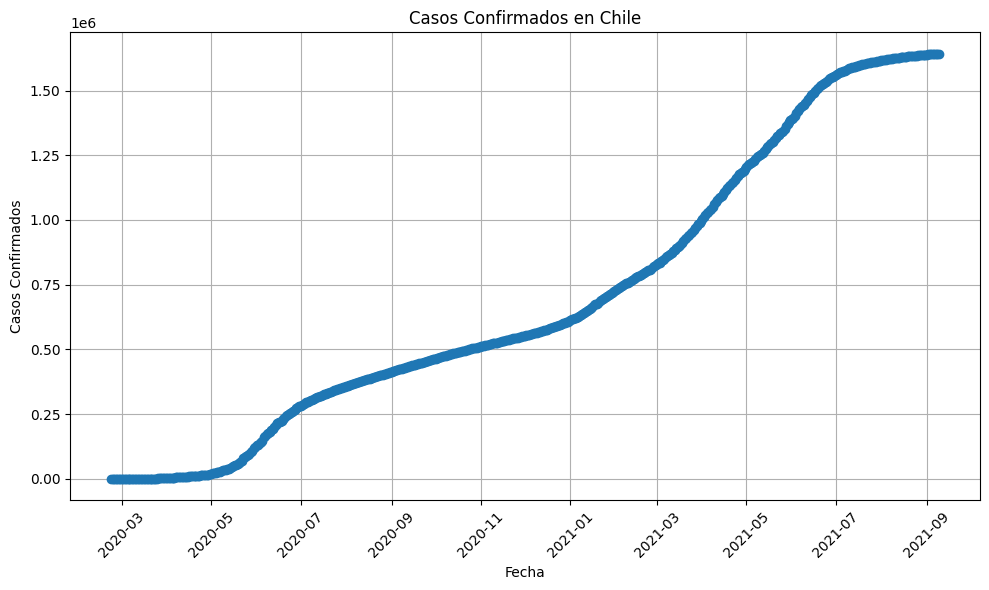

In [131]:
import matplotlib.pyplot as plt

query = """
    SELECT date, confirmed_cases
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Chile'
    ORDER BY date DESC
    
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Convierte la columna 'date' a formato de fecha
df['date'] = pd.to_datetime(df['date'])

# Ordena los datos por fecha
df = df.sort_values(by='date')

# Crea el gráfico lineal
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['confirmed_cases'], marker='o', linestyle='-')
plt.title('Casos Confirmados en Chile')
plt.xlabel('Fecha')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Gráfico Pastel

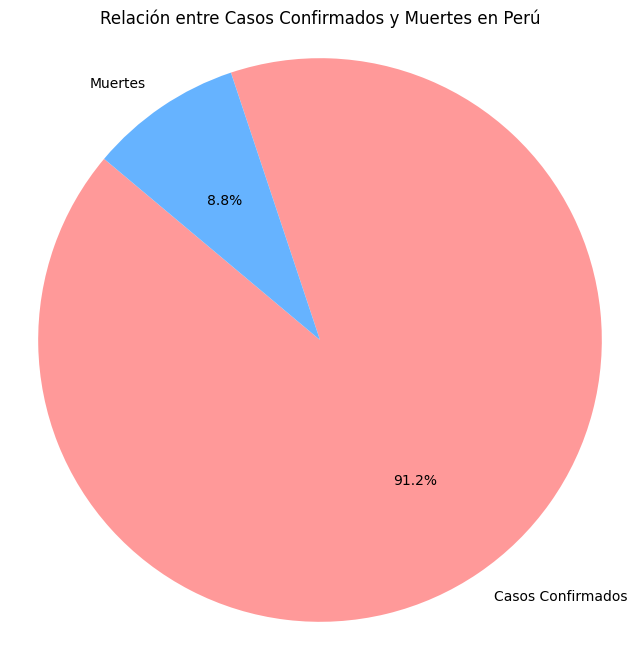

In [46]:
# Define tu consulta SQL con la condición WHERE
query = """
    SELECT SUM(confirmed_cases) AS total_confirmed_cases, SUM(deaths) AS total_deaths
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Peru'
    LIMIT 1
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Obtén los totales de casos confirmados y muertes
total_confirmed_cases = df['total_confirmed_cases'].iloc[0]
total_deaths = df['total_deaths'].iloc[0]

# Crea los datos para el gráfico de pastel
sizes = [total_confirmed_cases, total_deaths]
labels = ['Casos Confirmados', 'Muertes']
colors = ['#ff9999', '#66b3ff']

# Crea el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Relación entre Casos Confirmados y Muertes en Perú')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Gráfico de Burbujas

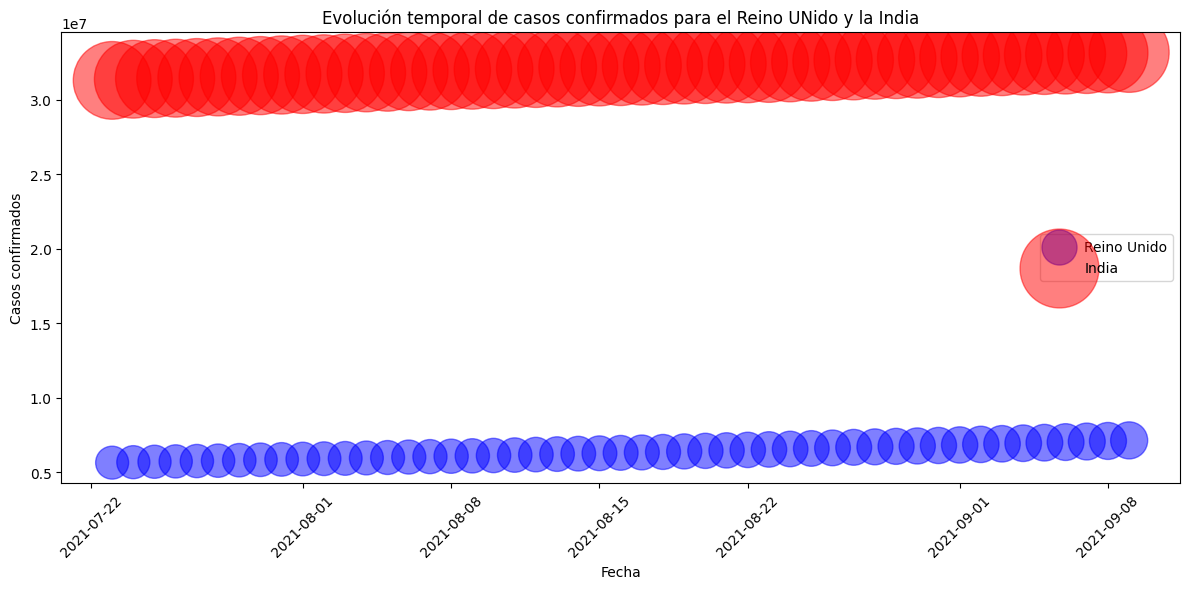

In [185]:
query = """
    SELECT country_name, date, confirmed_cases
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name IN ('United Kingdom', 'India')
    ORDER BY date DESC
    LIMIT 300
    
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Filtrar los datos para los países seleccionados
df_filtered = df[df['country_name'].isin(['United Kingdom', 'India'])]

# Agrupar los datos por país y fecha
grouped = df_filtered.groupby(['country_name', 'date']).agg({'confirmed_cases': 'max'}).reset_index()

# Obtener los datos para cada país
uk_data = grouped[grouped['country_name'] == 'United Kingdom']
i_data = grouped[grouped['country_name'] == 'India']

# Ajustar el tamaño de las burbujas
bubble_size_uk = uk_data['confirmed_cases'] * 0.0001
bubble_size_i = i_data['confirmed_cases'] * 0.0001

# Graficar los datos como un gráfico de burbujas
plt.figure(figsize=(12, 6))

plt.scatter(uk_data['date'], uk_data['confirmed_cases'], s=bubble_size_uk, alpha=0.5, c='blue', label='Reino Unido')
plt.scatter(i_data['date'], i_data['confirmed_cases'], s=bubble_size_i, alpha=0.5, c='red', label='India')

plt.title('Evolución temporal de casos confirmados para el Reino UNido y la India')
plt.xlabel('Fecha')
plt.ylabel('Casos confirmados')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de Pirámide

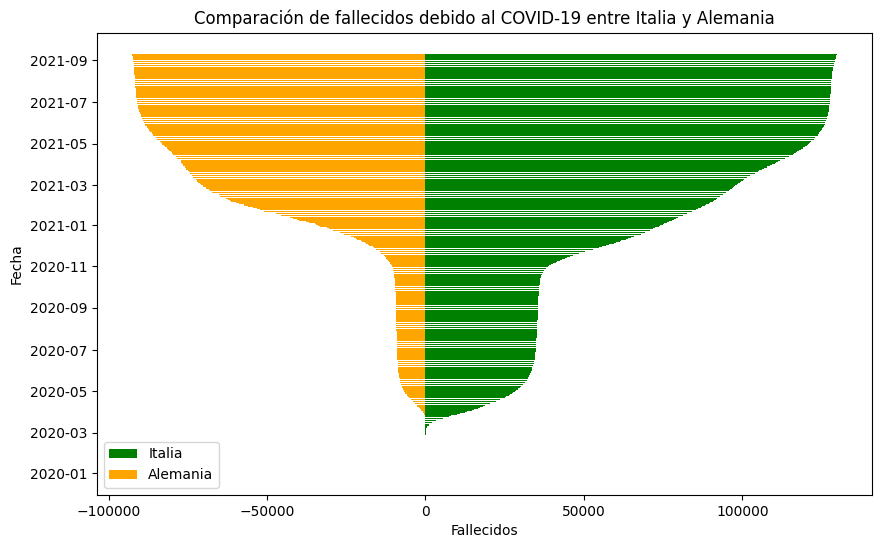

In [187]:
query = """
    SELECT country_name, date, deaths
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name IN ('Italy', 'Germany')
    ORDER BY date DESC
    
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Filtra los datos para Italia y Alemania
italy_data = df[df['country_name'] == 'Italy']
germany_data = df[df['country_name'] == 'Germany']

# Agrupa los datos por fecha y calcula la suma de muertes para cada país
italy_deaths = italy_data.groupby('date')['deaths'].sum()
germany_deaths = germany_data.groupby('date')['deaths'].sum()

# Crea el gráfico de pirámide
plt.figure(figsize=(10, 6))

# Grafica los datos de Italia
plt.barh(italy_deaths.index, italy_deaths.values, color='green', label='Italia')

# Grafica los datos de Alemania
plt.barh(germany_deaths.index, -germany_deaths.values, color='orange', label='Alemania')

# Configuración del gráfico
plt.xlabel('Fallecidos')
plt.ylabel('Fecha')
plt.title('Comparación de fallecidos debido al COVID-19 entre Italia y Alemania')
plt.legend()

# Muestra el gráfico
plt.show()

# Gráfico de Barras

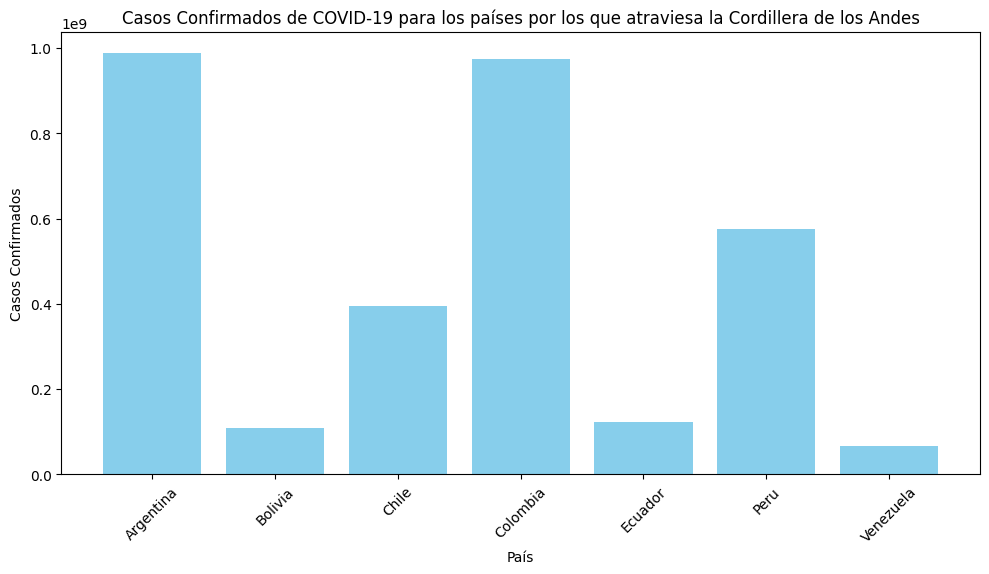

In [188]:
query = """
    SELECT country_name, SUM(confirmed_cases) AS total_confirmed_cases
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name IN ('Argentina', 'Bolivia', 'Chile', 'Colombia', 'Ecuador', 'Peru', 'Venezuela')
    GROUP BY country_name
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Configura el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df['country_name'], df['total_confirmed_cases'], color='skyblue')

# Configuración del gráfico
plt.xlabel('País')
plt.ylabel('Casos Confirmados')
plt.title('Casos Confirmados de COVID-19 para los países por los que atraviesa la Cordillera de los Andes')

# Muestra el gráfico
plt.xticks(rotation=45)  # Rotación de los nombres de los países en el eje X para mejor visualización
plt.tight_layout()  # Ajusta el diseño del gráfico para evitar superposiciones
plt.show()